## Details
* Name : Tanmoy Ghosh/Arijit Guha Biswas
* Group details : 17
* Dataset: Super Market Data Set

# SUPER MARKET DATA SET ANALYSIS

### 1. Import Libraries/Dataset

In [112]:
import pandas as pd
from datetime import datetime
import datetime
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth=1000
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import ensemble
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import joblib

In [113]:
data_df=pd.read_csv('Supermarket_Sales_Dataset.csv',delimiter=',')

In [114]:
data_df.reset_index(inplace=True)
col_names = list(data_df.columns)
print(data_df.shape)
print('_ '*50)
print(data_df.head())
print('_ '*50)

(1000, 17)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
   index   Invoice ID Branch       City Customer Type  Gender            Product Type  Unit Price  Quantity     Tax   Selling Price       Date   Time Payment Type  Cost Price  Gross Income  Rating
0      0  750-67-8428      A  Bangalore        Member  Female       Health and beauty       74.69         7  26.1415       548.9715   1/5/2019  13:08   Debit card      522.83       26.1415     9.1
1      1  226-31-3081      C     Mysore        Normal  Female  Electronic accessories       15.28         5   3.8200        80.2200   3/8/2019  10:29         Cash       76.40        3.8200     9.6
2      2  631-41-3108      A  Bangalore        Normal    Male      Home and lifestyle       46.33         7  16.2155       340.5255   3/3/2019  13:23  Credit card      324.31       16.2155     7.4
3      3  123-19-1176      A  Bangalore        Member    Male       Health and beauty       58.22   

## 2. Data Visualization and Exploration

print(data_df.describe())
print('_ '*50)

In [115]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1000 non-null   int64  
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer Type  1000 non-null   object 
 5   Gender         1000 non-null   object 
 6   Product Type   1000 non-null   object 
 7   Unit Price     1000 non-null   float64
 8   Quantity       1000 non-null   int64  
 9   Tax            1000 non-null   float64
 10  Selling Price  1000 non-null   float64
 11  Date           1000 non-null   object 
 12  Time           1000 non-null   object 
 13  Payment Type   1000 non-null   object 
 14  Cost Price     1000 non-null   float64
 15  Gross Income   1000 non-null   float64
 16  Rating         1000 non-null   float64
dtypes: float64(6), int64(2), object(9)
memory usage: 132.

<b>Null value counts against each column<b/>

In [116]:
data_df.isnull().sum()

index            0
Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Date             0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
dtype: int64

In [117]:
data_df=data_df.drop_duplicates()
print(data_df.shape)

(1000, 17)


In [118]:
data_df.nunique()

index            1000
Invoice ID       1000
Branch              3
City                3
Customer Type       2
Gender              2
Product Type        6
Unit Price        943
Quantity           10
Tax               990
Selling Price     990
Date               89
Time              506
Payment Type        3
Cost Price        990
Gross Income      990
Rating             61
dtype: int64

<b>Histogram plot<b/>

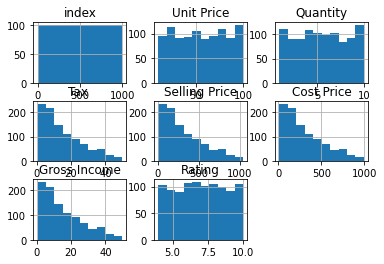

In [119]:
data_df.hist()
plt.show()

<b>Descriptive Analysis on data<b/>

In [120]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500000,288.819436,0.0000,249.750000,499.500,749.25000,999.00
Unit Price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
Tax,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Selling Price,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
Cost Price,1000.0,307.587380,234.176510,10.1700,118.497500,241.760,448.90500,993.00
Gross Income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Rating,1000.0,6.972700,1.718580,4.0000,5.500000,7.000,8.50000,10.00


In [121]:
for i, val in enumerate(col_names[2:]):
    print (val)
    print(data_df.groupby([val], dropna=False, as_index=False).size().head())

Branch
  Branch  size
0      A   340
1      B   332
2      C   328
City
        City  size
0  Bangalore   340
1  Mangalore   332
2     Mysore   328
Customer Type
  Customer Type  size
0        Member   501
1        Normal   499
Gender
   Gender  size
0  Female   501
1    Male   499
Product Type
             Product Type  size
0  Electronic accessories   170
1     Fashion accessories   178
2      Food and beverages   174
3       Health and beauty   152
4      Home and lifestyle   160
Unit Price
   Unit Price  size
0       10.08     1
1       10.13     1
2       10.16     1
3       10.17     1
4       10.18     1
Quantity
   Quantity  size
0         1   112
1         2    91
2         3    90
3         4   109
4         5   102
Tax 
     Tax   size
0  0.5085     1
1  0.6045     1
2  0.6270     1
3  0.6390     1
4  0.6990     1
Selling Price
   Selling Price  size
0        10.6785     1
1        12.6945     1
2        13.1670     1
3        13.4190     1
4        14.6790     1
Date
      

<b>Correlation matrix<b/>

In [122]:
np.round(data_df.corr(),2)

,index,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating
index,1.00,-0.00,-0.07,-0.05,-0.05,-0.05,-0.05,-0.03
Unit Price,-0.00,1.00,0.01,0.63,0.63,0.63,0.63,-0.01
Quantity,-0.07,0.01,1.00,0.71,0.71,0.71,0.71,-0.02
Tax,-0.05,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Selling Price,-0.05,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Cost Price,-0.05,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Gross Income,-0.05,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Rating,-0.03,-0.01,-0.02,-0.04,-0.04,-0.04,-0.04,1.00


<b>Data visualization using heat map<b/>

<AxesSubplot:>

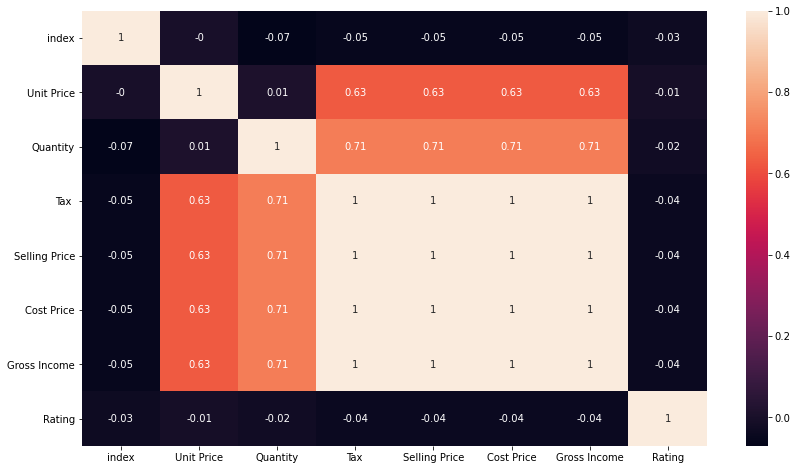

In [123]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(data_df.corr(),2),annot=True)


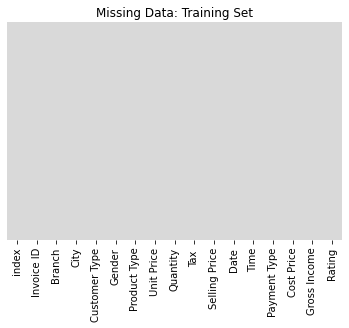

In [124]:
sns.heatmap(data_df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [125]:
data_df_ELec_Accessories = data_df[data_df['Product Type'] == 'Electronic accessories']

In [126]:
data_df_ELec_Accessories

,index,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
1,1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
5,5,699-14-3026,C,Mysore,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Debit card,597.73,29.8865,4.1
6,6,355-53-5943,A,Bangalore,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Debit card,413.04,20.6520,5.8
11,11,529-56-3974,B,Mangalore,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,5.1020,6.8
12,12,365-64-0515,A,Bangalore,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Debit card,234.75,11.7375,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,978,156-20-0370,B,Mangalore,Normal,Female,Electronic accessories,25.45,1,1.2725,26.7225,3/10/2019,18:10,Credit card,25.45,1.2725,5.1
984,984,189-40-5216,C,Mysore,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,33.7295,6.0
988,988,267-62-7380,C,Mysore,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Debit card,823.40,41.1700,4.3
992,992,745-74-0715,A,Bangalore,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Debit card,116.06,5.8030,8.8


<b>Which city has a better sale for products in the Electronic Accessories product line<b/>

In [127]:
df_Accessories=data_df[data_df["Product Type"] =="Electronic accessories"].groupby(['City','Product Type'])['Quantity'].sum().reset_index(name="Accessories_Count")
max_accessories=max(df_Accessories['Accessories_Count'])  
df_Accessories[df_Accessories['Accessories_Count']==max_accessories]


,City,Product Type,Accessories_Count
2,Mysore,Electronic accessories,333


<b>Grphical view(Bar plot) that Myshore has better sale for Electronics Accessories<b>

<function matplotlib.pyplot.show(close=None, block=None)>

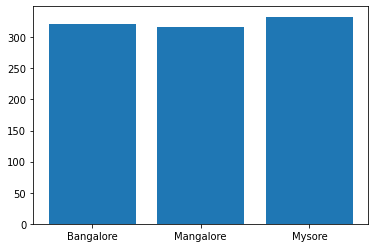

In [128]:
plt.bar(df_Accessories['City'].to_list(),df_Accessories['Accessories_Count'].to_list())
plt.show

In [129]:
data_df_FemaleCustomers = data_df[data_df['Gender'] == 'Female']

<b>Which Product type has been more purchased by female customers<b/>

In [130]:
df_quantity=data_df[data_df["Gender"] =="Female"].groupby(['Gender','Product Type'])['Quantity'].sum().reset_index(name="Quantity_Count")
max_quantity=max(df_quantity['Quantity_Count'])  
df_quantity[df_quantity['Quantity_Count']==max_quantity]



,Gender,Product Type,Quantity_Count
1,Female,Fashion accessories,530


<b>Grphical view that Fashion Accessories are purchased more by female customers<b/>

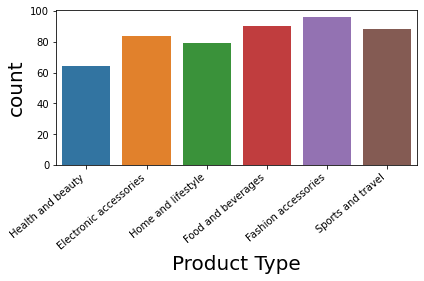

In [131]:
ax = sns.countplot(x="Product Type", data=data_df_FemaleCustomers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Product Type", fontsize=20)
ax.set_ylabel("count", fontsize=20)
plt.tight_layout()
plt.show()

In [132]:

data_df["Date"]= pd.to_datetime(data_df["Date"])

In [133]:
data_df['Month'] = data_df['Date'].dt.strftime('%b')

In [134]:
data_df.head(10)

,index,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,Month
0,0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Debit card,522.83,26.1415,9.1,Jan
1,1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,Mar
2,2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,Mar
3,3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Debit card,465.76,23.2880,8.4,Jan
4,4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Debit card,604.17,30.2085,5.3,Feb
5,5,699-14-3026,C,Mysore,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Debit card,597.73,29.8865,4.1,Mar
6,6,355-53-5943,A,Bangalore,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Debit card,413.04,20.6520,5.8,Feb
7,7,315-22-5665,C,Mysore,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Debit card,735.60,36.7800,8.0,Feb
8,8,665-32-9167,A,Bangalore,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,3.6260,7.2,Jan
9,9,692-92-5582,B,Mangalore,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,8.2260,5.9,Feb


In [135]:
data_df_Home_lifestyle = data_df[data_df['Product Type'] == 'Home and lifestyle']

<b>In which month does the highest number of home and lifestyle products have been sold<b/>

In [136]:
df_month_quantity=data_df[data_df["Product Type"] =="Home and lifestyle"].groupby(['Month','Product Type'])['Quantity'].sum().reset_index(name="Quantity_Count")
max_month_quantity=max(df_month_quantity['Quantity_Count'])  
df_month_quantity[df_month_quantity['Quantity_Count']==max_month_quantity]



,Month,Product Type,Quantity_Count
2,Mar,Home and lifestyle,364


<b>Below grapgh(Count plot) shows that highest number of Home and lifestyle product was sold in March<b/>

Product type Home and lifestyle sold every month
0    205
1    342
2    364
Name: Quantity_Count, dtype: int64


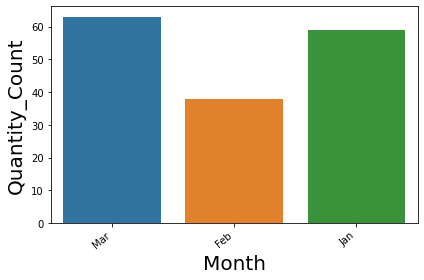

In [137]:
print('Product type Home and lifestyle sold every month')
print(df_month_quantity['Quantity_Count'])
ax = sns.countplot(x="Month", data=data_df_Home_lifestyle)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Quantity_Count", fontsize=20)
plt.tight_layout()
plt.show()



In [138]:
data_df['City_Branch']=data_df.apply(lambda x:'%s_%s' % (x['Branch'],x['City']),axis=1)

In [139]:
data_df.head()

,index,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,Month,City_Branch
0,0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Debit card,522.83,26.1415,9.1,Jan,A_Bangalore
1,1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,Mar,C_Mysore
2,2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,Mar,A_Bangalore
3,3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Debit card,465.76,23.2880,8.4,Jan,A_Bangalore
4,4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Debit card,604.17,30.2085,5.3,Feb,A_Bangalore


<b>Which payment method is used more often at a particular city, branch and for which product type<b/>

Debit card     345
Cash           344
Credit card    311
Name: Payment Type, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Payment Type Debit Card is often used
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
A_Bangalore    126
B_Mangalore    113
C_Mysore       106
Name: City_Branch, dtype: int64


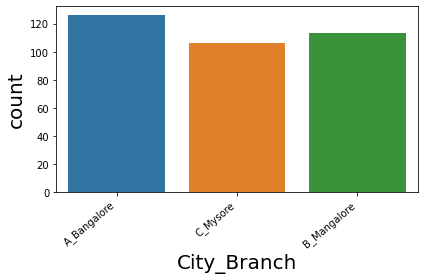

In [140]:
print(data_df['Payment Type'].value_counts(ascending=False))
print('_ '*50)
print('Payment Type Debit Card is often used')
print('_ '*50)
data_df_DebitCard = data_df[data_df['Payment Type'] == 'Debit card']

print(data_df_DebitCard['City_Branch'].value_counts(ascending=False))
ax = sns.countplot(x="City_Branch", data=data_df_DebitCard)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("City_Branch", fontsize=20)
ax.set_ylabel("count", fontsize=20)
plt.tight_layout()
plt.show()


# Perform data wrangling / pre-processing 

<b>Perform Mapping of Categorical Attribute-Branch through lebel encoder<b/>

In [141]:
LE_Branch = LabelEncoder()
data_df['Branch'] = LE_Branch.fit_transform(data_df['Branch'])
joblib.dump(LE_Branch, 'branch_encoder.pkl')
print(data_df.groupby(['Branch'], as_index=False).size())

   Branch  size
0       0   340
1       1   332
2       2   328


<b>Perform Mapping of Categorical Attribute-City through lebel encoder<b/>

In [142]:
LE_City = LabelEncoder()
data_df['City'] = LE_City.fit_transform(data_df['City'])
joblib.dump(LE_City,'City_encoder.pkl')

print(data_df.groupby(['City'],  as_index=False).size())

   City  size
0     0   340
1     1   332
2     2   328


<b>Perform Mapping of Categorical Attribute-Customer through lebel encoder<b/>

In [143]:
LE_Customer = LabelEncoder()
data_df['Customer Type'] = LE_Customer.fit_transform(data_df['Customer Type'])
joblib.dump(LE_Customer,'Customer_encoder.pkl')

print(data_df.groupby(['Customer Type'], as_index=False).size())

   Customer Type  size
0              0   501
1              1   499


<b>Perform Mapping of Categorical Attribute-Gender through lebel encoder<b/>

In [144]:
LE_Gender = LabelEncoder()
data_df['Gender'] = LE_Gender.fit_transform(data_df['Gender'])
joblib.dump(LE_Gender,'Gender_encoder.pkl')

print(data_df.groupby(['Gender'], as_index=False).size())

   Gender  size
0       0   501
1       1   499


<b>Perform Mapping of Categorical Attribute-Product through lebel encoder<b/>

In [145]:
LE_Product = LabelEncoder()
data_df['Product Type'] = LE_Product.fit_transform(data_df['Product Type'])
joblib.dump(LE_Product,'Product.pkl')

print(data_df.groupby(['Product Type'], as_index=False).size())

   Product Type  size
0             0   170
1             1   178
2             2   174
3             3   152
4             4   160
5             5   166


<b>Perform Mapping of Categorical Attribute-Payment method through lebel encoder<b/>

In [146]:
LE_Payment = LabelEncoder()
data_df['Payment Type'] = LE_Product.fit_transform(data_df['Payment Type'])
joblib.dump(LE_Payment,'Payment.pkl')

print(data_df.groupby(['Payment Type'], as_index=False).size())

   Payment Type  size
0             0   344
1             1   311
2             2   345


<b>Rating is our target variable and to be classified into several catagories<b/>

In [147]:
data_df["Rating_Cat"] = pd.cut(data_df['Rating'], [0,4,8,10], labels=[1,2,3])
data_df.head()

,index,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,Month,City_Branch,Rating_Cat
0,0,750-67-8428,0,0,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,13:08,2,522.83,26.1415,9.1,Jan,A_Bangalore,3
1,1,226-31-3081,2,2,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29,0,76.40,3.8200,9.6,Mar,C_Mysore,3
2,2,631-41-3108,0,0,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,13:23,1,324.31,16.2155,7.4,Mar,A_Bangalore,2
3,3,123-19-1176,0,0,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,20:33,2,465.76,23.2880,8.4,Jan,A_Bangalore,3
4,4,373-73-7910,0,0,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,10:37,2,604.17,30.2085,5.3,Feb,A_Bangalore,2


In [148]:
data_df["Gross Income"] = pd.cut(data_df['Gross Income'], [0,5,10,15,20,25,30], labels=[1,2,3,4,5,6])
data_df.head()

,index,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,Month,City_Branch,Rating_Cat
0,0,750-67-8428,0,0,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,13:08,2,522.83,6,9.1,Jan,A_Bangalore,3
1,1,226-31-3081,2,2,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29,0,76.40,1,9.6,Mar,C_Mysore,3
2,2,631-41-3108,0,0,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,13:23,1,324.31,4,7.4,Mar,A_Bangalore,2
3,3,123-19-1176,0,0,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,20:33,2,465.76,5,8.4,Jan,A_Bangalore,3
4,4,373-73-7910,0,0,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,10:37,2,604.17,NaN,5.3,Feb,A_Bangalore,2


<b>Before 09 is early Morning , 9am to 1 pm is morning , 1pm to 5pm Afternoon and After 5pm Evening<b/>



In [149]:
Time10="09:00"
Time14="13:00"
Time18="17:00"


Time10 = datetime.datetime.strptime(Time10, '%H:%M')
Time10 = datetime.time(Time10.hour, Time10.minute)
Time14 = datetime.datetime.strptime(Time14, '%H:%M')
Time14 = datetime.time(Time14.hour, Time14.minute)
Time18 = datetime.datetime.strptime(Time18, '%H:%M')
Time18 = datetime.time(Time18.hour, Time18.minute)

def Time_Details(x):
    
      x = datetime.datetime.strptime(x, '%H:%M')
      x = datetime.time(x.hour, x.minute)
      if x <= Time10:
          return 1
      elif (x > Time10 and x <= Time14):
        return 2
      elif (x > Time14 and x <= Time18):
        return 3
      elif (x > Time18):
        return 4
      else:
          return 0
data_df['Time'] = data_df['Time'].apply(Time_Details)
data_df.head()


,index,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,Month,City_Branch,Rating_Cat
0,0,750-67-8428,0,0,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,3,2,522.83,6,9.1,Jan,A_Bangalore,3
1,1,226-31-3081,2,2,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,2,0,76.40,1,9.6,Mar,C_Mysore,3
2,2,631-41-3108,0,0,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,3,1,324.31,4,7.4,Mar,A_Bangalore,2
3,3,123-19-1176,0,0,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,4,2,465.76,5,8.4,Jan,A_Bangalore,3
4,4,373-73-7910,0,0,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,2,2,604.17,NaN,5.3,Feb,A_Bangalore,2


<b>Few attributes are dropped which are not at all required our prediction model<b/>

In [150]:
data_df_bkp=data_df.copy(deep=True)
data_df = data_df.drop(['Invoice ID', 'Unit Price', 'Selling Price', 'Tax ', 'Date', 'Cost Price', 'City_Branch', 'index' , 'Month'], axis=1)
data_df=data_df.dropna()
print(data_df.columns)
print(data_df.head())

Index(['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income', 'Rating', 'Rating_Cat'],
      dtype='object')
   Branch  City  Customer Type  Gender  Product Type  Quantity  Time  Payment Type Gross Income  Rating Rating_Cat
0       0     0              0       0             3         7     3             2            6     9.1          3
1       2     2              1       0             0         5     2             0            1     9.6          3
2       0     0              1       1             4         7     3             1            4     7.4          2
3       0     0              0       1             3         8     4             2            5     8.4          3
5       2     2              1       1             0         7     4             2            6     4.1          2


In [151]:
print(data_df.head())

   Branch  City  Customer Type  Gender  Product Type  Quantity  Time  Payment Type Gross Income  Rating Rating_Cat
0       0     0              0       0             3         7     3             2            6     9.1          3
1       2     2              1       0             0         5     2             0            1     9.6          3
2       0     0              1       1             4         7     3             1            4     7.4          2
3       0     0              0       1             3         8     4             2            5     8.4          3
5       2     2              1       1             0         7     4             2            6     4.1          2


In [152]:
data_df.to_csv('data_df_dump.csv', header=True,index=False)

In [153]:
data_df_FemaleCustomers = data_df[data_df['Gender'] == 1]

In [154]:
print(data_df_FemaleCustomers.head())

    Branch  City  Customer Type  Gender  Product Type  Quantity  Time  Payment Type Gross Income  Rating Rating_Cat
2        0     0              1       1             4         7     3             1            4     7.4          2
3        0     0              0       1             3         8     4             2            5     8.4          3
5        2     2              1       1             0         7     4             2            6     4.1          2
11       1     1              0       1             0         4     4             0            2     6.8          2
13       0     0              1       1             2        10     3             2            5     8.2          3


In [155]:
data_df.shape

(863, 11)

<b>Which Product type has been more purchased by female customers</b>

Product Purchased by Female Customer mostly at what time
2 : Morning
3 : Afternoon
4 : Evening
--------------------------------------------------------------------------------------------------------
4    166
3    164
2    104
Name: Time, dtype: int64


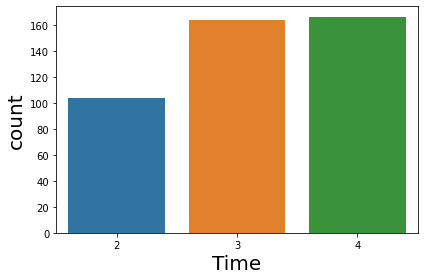

In [156]:
print('Product Purchased by Female Customer mostly at what time')
print("2 : Morning")
print("3 : Afternoon")
print("4 : Evening")
print("--------------------------------------------------------------------------------------------------------")
print(data_df_FemaleCustomers['Time'].value_counts(ascending=False))
ax = sns.countplot(x="Time", data=data_df_FemaleCustomers)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("count", fontsize=20)
plt.tight_layout()
plt.show()

In [157]:
data_df.columns

Index(['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income', 'Rating', 'Rating_Cat'],
      dtype='object')

<b>Below section will perform the K-means clustering and visualize the clusters through elbow method<b/>

In [158]:
Final_training_data_cluster=data_df[['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income', 'Rating']]

In [159]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [160]:
X=Final_training_data_cluster.drop(['Time'], axis=1)

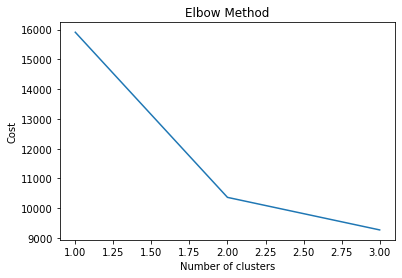

In [161]:
import warnings
warnings.filterwarnings('ignore')
cost_list = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=2000, n_init=100, random_state=10)
    kmeans.fit(X)
    cost_list.append(kmeans.inertia_)
plt.plot(range(1, 4), cost_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

In [162]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=2000, n_init=100, random_state=10)
pred_cluster = kmeans.fit_predict(X)

In [163]:
pred_cluster=list(pred_cluster)

<b>Principal component analysis along with cosine similarity<b/>

In [164]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(X)
pca = PCA(n_components=3).fit(dist)
pca_2d=pca.transform(dist)

In [165]:
pca_2d

array([[-1.10756553, -0.92728326,  0.121379  ],
       [ 0.90577826, -0.26452009, -1.46041947],
       [-1.33771643, -0.8446314 ,  0.73332228],
       ...,
       [ 3.11177498,  1.13144498,  0.4036156 ],
       [ 3.30376476,  0.85472599, -0.40765061],
       [ 2.60706496,  2.73395385,  1.77144715]])

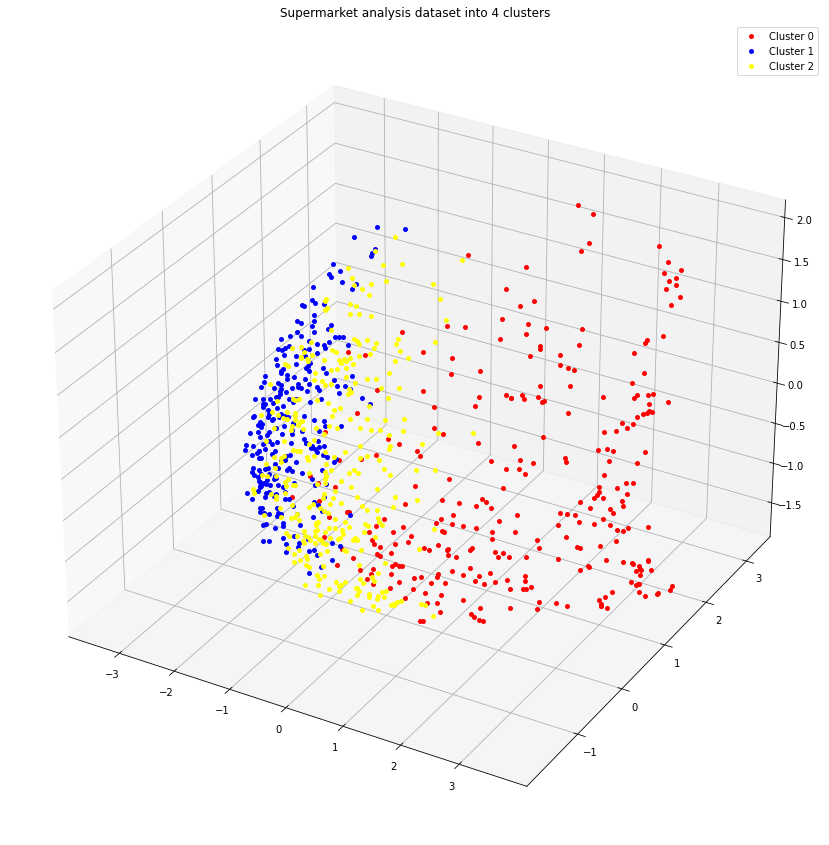

In [166]:
x, y, z = pca_2d[:, 0], pca_2d[:, 1], pca_2d[:, 2]

colors = {0: 'red',
          1: 'blue',
          2: 'yellow'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2'}
  
df = pd.DataFrame({'x': x, 'y':y,'z':z, 'label':pred_cluster}) 
groups = df.groupby('label')

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    ax.plot(group.x, group.y, group.z, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    ax.tick_params(axis= 'z',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Supermarket analysis dataset into 4 clusters")
plt.show()

<b>FEATURE SELECTION USING CHI2, MUTUAL INFO SHARING in order to pick top 5 features<b/>

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [168]:
data_df.head()

,Branch,City,Customer Type,Gender,Product Type,Quantity,Time,Payment Type,Gross Income,Rating,Rating_Cat
0,0,0,0,0,3,7,3,2,6,9.1,3
1,2,2,1,0,0,5,2,0,1,9.6,3
2,0,0,1,1,4,7,3,1,4,7.4,2
3,0,0,0,1,3,8,4,2,5,8.4,3
5,2,2,1,1,0,7,4,2,6,4.1,2


In [169]:
data_df.columns

Index(['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income', 'Rating', 'Rating_Cat'],
      dtype='object')

In [170]:
data_df.drop(['Rating'],axis = 1)

,Branch,City,Customer Type,Gender,Product Type,Quantity,Time,Payment Type,Gross Income,Rating_Cat
0,0,0,0,0,3,7,3,2,6,3
1,2,2,1,0,0,5,2,0,1,3
2,0,0,1,1,4,7,3,1,4,2
3,0,0,0,1,3,8,4,2,5,3
5,2,2,1,1,0,7,4,2,6,2
...,...,...,...,...,...,...,...,...,...,...
993,1,1,1,1,1,10,4,2,2,2
994,2,2,0,0,0,1,2,2,1,2
995,2,2,1,1,3,1,3,2,1,2
997,0,0,0,1,2,1,3,0,1,2


In [171]:
Final_training_data_new=data_df[['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income','Rating_Cat']]

<b>FEATURE SELECTION USING CHI2 METHODS for picking top 5 features and also visualized the top five features using bar plot<b/>

   Branch  City  Customer Type  Gender  Product Type  Quantity  Time  Payment Type Gross Income
0       0     0              0       0             3         7     3             2            6
1       2     2              1       0             0         5     2             0            1
2       0     0              1       1             4         7     3             1            4
3       0     0              0       1             3         8     4             2            5
5       2     2              1       1             0         7     4             2            6
Train Feature 0: 0.271082
Train Feature Branch
Train Feature 1: 0.271082
Train Feature City
Train Feature 2: 0.216635
Train Feature Customer Type
Train Feature 3: 0.189889
Train Feature Gender
Train Feature 4: 1.276205
Train Feature Product Type
Train Feature 5: 3.305136
Train Feature Quantity
Train Feature 6: 0.084739
Train Feature Time
Train Feature 7: 0.392694
Train Feature Payment Type
Train Feature 8: 2.535107
Train

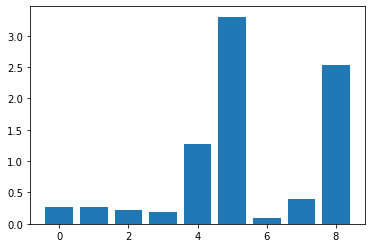

In [172]:

def select_features(X_train, y_train):
	fs = SelectKBest(score_func=chi2, k=5)
	fs.fit_transform(X_train, y_train)
	return fs



X = Final_training_data_new.drop(columns=['Rating_Cat'])
print(X.head())
y = Final_training_data_new[['Rating_Cat']]
y=y.astype('int')

fs = select_features(X, y)

for i in range(len(fs.scores_)):
    print('Train Feature %d: %f' % (i, fs.scores_[i]))
    print('Train Feature',list(X.columns)[i])
    

selected_features_chi2 = list(X.columns[fs.get_support(indices=True)])
print(selected_features_chi2)


pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

<b>FEATURE SELECTION USING Mutual Info  for picking top 5 features and also visualized the top five features using bar plot<b/>

Train Feature 0: 0.008727
Train Feature Branch
Train Feature 1: 0.000000
Train Feature City
Train Feature 2: 0.007216
Train Feature Customer Type
Train Feature 3: 0.000000
Train Feature Gender
Train Feature 4: 0.017916
Train Feature Product Type
Train Feature 5: 0.007149
Train Feature Quantity
Train Feature 6: 0.000000
Train Feature Time
Train Feature 7: 0.000000
Train Feature Payment Type
Train Feature 8: 0.000000
Train Feature Gross Income
['Branch', 'Customer Type', 'Product Type', 'Quantity', 'Gross Income']


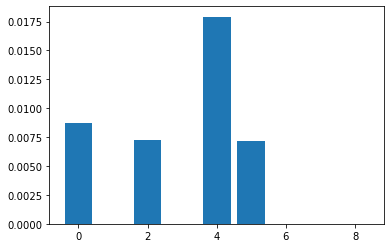

In [173]:

def select_features(X_train, y_train):
	fs = SelectKBest(score_func=mutual_info_classif, k=5)
	fs.fit_transform(X_train, y_train)
	return fs


X = Final_training_data_new.drop(['Rating_Cat'], axis=1)
y = Final_training_data_new[['Rating_Cat']]
y=y.astype('int')

fs = select_features(X, y)


for i in range(len(fs.scores_)):
    print('Train Feature %d: %f' % (i, fs.scores_[i]))
    print('Train Feature',list(X.columns)[i])
    

selected_features_mutual_info = list(X.columns[fs.get_support(indices=True)])
print(selected_features_mutual_info)


pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [174]:
selected_features_chi2

['City', 'Product Type', 'Quantity', 'Payment Type', 'Gross Income']

In [175]:
selected_features_mutual_info

['Branch', 'Customer Type', 'Product Type', 'Quantity', 'Gross Income']

In [176]:
final_features=selected_features_chi2+selected_features_mutual_info
final_features=[feature for feature in final_features if feature!='Time']
final_features=list(set(final_features))
final_features.append('Quantity')


In [177]:
data_df['Rating'].value_counts()

7.0     20
6.6     19
6.0     19
5.0     19
9.5     18
        ..
5.3     10
4.0      9
4.7      9
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [178]:
data_df.columns

Index(['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income', 'Rating', 'Rating_Cat'],
      dtype='object')

In [179]:
data_df['Rating'].value_counts()

7.0     20
6.6     19
6.0     19
5.0     19
9.5     18
        ..
5.3     10
4.0      9
4.7      9
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [180]:
X = data_df[final_features]
Y = data_df['Rating_Cat']
Y=Y.astype('int')

In [181]:
X.head(2)

,Product Type,Payment Type,City,Quantity,Gross Income,Branch,Customer Type,Quantity
0,3,2,0,7,6,0,0,7
1,0,0,2,5,1,2,1,5


<b>Splitting the data set in which 80% will be used for trainig data and 20% for testing data<b/>

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
X=X.replace(np.nan,0)
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.15,random_state=1221)

In [183]:
print(X_train.head())
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

     Product Type  Payment Type  City  Quantity Gross Income  Branch  Customer Type  Quantity
450             0             0     1         6            5       1              1         6
877             0             0     1         1            1       1              0         1
743             4             2     0         2            1       0              0         2
674             0             1     0        10            5       0              1        10
937             5             0     0         5            5       0              1         5
(130, 8)
(733,)
(130,)


<b>Model building using random forest in order to predict our target variable Rating<b/>

In [184]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5,7,10,12,15,20,25],
    'max_features': ["log2","sqrt","Auto"],
    'min_samples_leaf': [2,3, 4, 5, 7,10],
    'min_samples_split': [3,5,8, 10, 12],
    'n_estimators': [60,80,100,120,150,180,200],
    'criterion':['gini','entropy']
}

clf_rf =RandomizedSearchCV(estimator = rf,param_distributions=param_grid, n_jobs=1, verbose=2, cv=10,random_state=42)


In [185]:
clf_rf=RandomForestClassifier(n_estimators= 80, min_samples_split= 4, min_samples_leaf= 3, max_features= 'log2', max_depth= 5, criterion='entropy')
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=80)

In [186]:
y_pred=clf_rf.predict(X_test)
y_pred_Train=clf_rf.predict(X_train)

<b>Training and Testing accuracy in Random forest which is consecutively 67% and 70%<b/>

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Training Accuracy::::      ",accuracy_score(y_train,y_pred_Train))
print("Testing Accuracy::::      ",accuracy_score(y_test,y_pred))


Training Accuracy::::       0.684856753069577
Testing Accuracy::::       0.7


<b>Confusion matrix print<b/>

In [188]:
print(confusion_matrix(y_train,y_pred_Train))
print(confusion_matrix(y_test,y_pred))


[[  0   5   2]
 [  0 489   0]
 [  0 224  13]]
[[ 0  2  0]
 [ 0 91  1]
 [ 0 36  0]]


<b>Classification report<b/>

In [189]:
print(classification_report(y_train,y_pred_Train))
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.68      1.00      0.81       489
           3       0.87      0.05      0.10       237

    accuracy                           0.68       733
   macro avg       0.52      0.35      0.30       733
weighted avg       0.73      0.68      0.57       733

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.71      0.99      0.82        92
           3       0.00      0.00      0.00        36

    accuracy                           0.70       130
   macro avg       0.24      0.33      0.27       130
weighted avg       0.50      0.70      0.58       130



<b>Predictive model using DEcision tree<b/>

In [190]:
from sklearn import tree

In [191]:
rf = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': [3,5,7,10,12,15,20,25],
    'max_features': ["log2","sqrt","Auto"],
    'min_samples_leaf': [2,3, 4, 5, 7,10],
    'min_samples_split': [3,5,8, 10, 12],
    'criterion':['gini','entropy']
}

clf_rf =RandomizedSearchCV(estimator = rf,param_distributions=param_grid, n_jobs=1, verbose=2, cv=10,random_state=42)
clf_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_sampl

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log2

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 20,
                                                      25],
                                        'max_features': ['log2', 'sqrt',
                                                         'Auto'],
                                        'min_samples_leaf': [2, 3, 4, 5, 7, 10],
                                        'min_samples_split': [3, 5, 8, 10, 12]},
                   random_state=42, verbose=2)

In [192]:
print(clf_rf.best_score_)
print(clf_rf.best_params_)

0.6494076268048871
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [193]:
clf_rf=tree.DecisionTreeClassifier(min_samples_split= 3, min_samples_leaf= 5, max_features= 'log2', max_depth= 6, criterion='entropy')
clf_rf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=5, min_samples_split=3)

In [197]:
y_pred=clf_rf.predict(X_test)
y_pred_Train=clf_rf.predict(X_train)

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.70      0.88      0.78        92
           3       0.27      0.11      0.16        36

    accuracy                           0.65       130
   macro avg       0.32      0.33      0.31       130
weighted avg       0.57      0.65      0.60       130



<b>Training accuracy is 69% and Testing accuracy is 66% using decision tree<b/>

In [199]:
print("Training Accuracy::::      ",accuracy_score(y_train,y_pred_Train))
print("Testing Accuracy::::      ",accuracy_score(y_test,y_pred))

Training Accuracy::::       0.6930422919508867
Testing Accuracy::::       0.6538461538461539


# Logistic Regression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


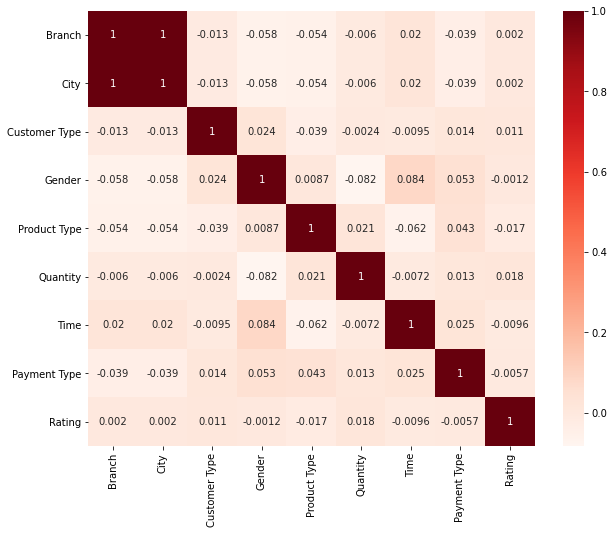

In [201]:
plt.figure(figsize=(10,8))

sns.heatmap(data_df.corr(),annot=True,cmap=plt.cm.Reds);

In [202]:
# Make new variable 
x = data_df[['Branch', 'City', 'Customer Type', 'Gender', 'Product Type', 'Quantity',
       'Time', 'Payment Type', 'Gross Income']]
y = data_df[['Rating_Cat']]

In [203]:
print(data_df.shape)
print(x.shape)
print(y.shape)

(863, 11)
(863, 9)
(863, 1)


In [204]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5, stratify=y)

In [205]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [206]:
print(x.shape, y.shape)
print(X_train_scaled.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(863, 9) (863, 1)
(690, 9) (690, 1)
(173, 9) (173, 1)


In [207]:
model = LogisticRegression()

In [208]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

<b>Training accuracy is 67.4% and Testing accuracy is 67% using Logistic regression<b/>

In [209]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 67.3913043478261


In [210]:
y_pred = model.predict(X_test)

In [211]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 67.05202312138728


<b>Classification Report<b/>

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80       116
           3       0.00      0.00      0.00        55

    accuracy                           0.67       173
   macro avg       0.22      0.33      0.27       173
weighted avg       0.45      0.67      0.54       173



<b>Confusion Matrix print<b/>

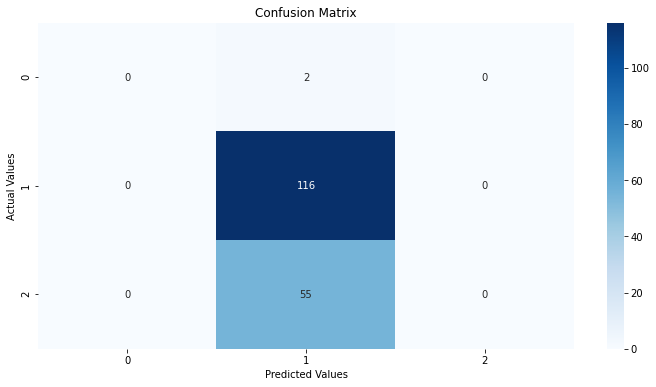

In [213]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [214]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Branch  City  Customer Type  Gender  Product Type  Quantity  Time  Payment Type Gross Income
957       1     1              1       1             0         6     3             0            3
208       1     1              1       0             1         3     3             2            1
51        0     0              0       0             2         5     3             0            3
626       0     0              1       1             5         2     2             2            2
688       2     2              0       1             5         2     2             0            2
..      ...   ...            ...     ...           ...       ...   ...           ...          ...
588       2     2              1       1             1        10     2             0            6
979       1     1              1       0             2         1     4             1            1
490       1     1              1       0             1         2     4             2            1
802       2     2   